# Zadanie 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import typing

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"]="--"

####Celem zadania było obliczenie całki metodą Monte Carlo oraz zastosowanie metody redukcji wariancji do jej ponownego obliczenia i porównanie otrzymanych wyników. Rozważana była całka
$$
\int_{0}^{1} \frac{4}{1+x^2} \, dx
$$
####której wynikiem jest szacunkowa wartość liczby $ \pi $.

####Najpierw używamy metody Monte Carlo do oszacowania wartości liczby $π$, generując losowe próbki w przedziale od $0$ do $1$, a następnie obliczając średnią wartość z wyliczonych równań, co daje nam przybliżenie wartości $π$.

In [23]:
def monte_carlo_pi(num_samples: int =10000) -> float:
    """
    Estimate the value of π using the Monte Carlo method.

    Parameters:
    num_samples (int): The number of samples to use in the Monte Carlo simulation.

    Returns:
    float: The estimated value of π.

    Example:
    >>> monte_carlo_pi()
    3.141592653589793
    """

    return np.mean(4 / (1 + np.random.uniform(0, 1, num_samples)**2))

# Test
pi_estimate = monte_carlo_pi()
print(f"Monte Carlo estimate of π with {num_samples} samples: {pi_estimate}")

Monte Carlo estimate of π with 10000 samples: 3.1376889746242576


####Następnie wykorzystano metodę odbić lustrzanych w celu zwiększenia dokładności otrzymanych wyników.

Metoda odbić lustrzanych jest techniką redukcji wariancji. Polega ona na tym, że dla każdej próby losowej rozważana jest również próba przeciwstawna - korelacja prób jest równa $-1$. Przyjęcie dwóch zbiorów wartości funkcji skutkuje zmniejszeniem wariancji i poprawieniem precyzji.

In [35]:
def monte_carlo_pi_antithetic(num_samples: int =10000) -> float:
    """
    Estimate the value of π using the Monte Carlo method with Antithetic Variates.

    Parameters:
    num_samples (int): The number of samples to use in the Monte Carlo simulation.
                       This should be an even number as it will be divided into two sets of samples.

    Returns:
    float: The estimated value of π using the Antithetic Variates method.

    Example:
    >>> monte_carlo_pi_antithetic()
    3.141592653589793
    """
    samples = np.random.uniform(0, 1, num_samples // 2)
    combined_samples = np.concatenate([samples, 1 - samples])
    return np.mean( 4 / (1 + combined_samples**2))

#Test
pi_estimate_antithetic = monte_carlo_pi_antithetic()
print(f"Antithetic Variates estimate of π with {num_samples} samples: {pi_estimate_antithetic}")

Antithetic Variates estimate of π with 10000 samples: 3.141836127077353


####Ostatnim krokiem jest wygenerowanie wykresu błędu względem ilości  dla obu metod.

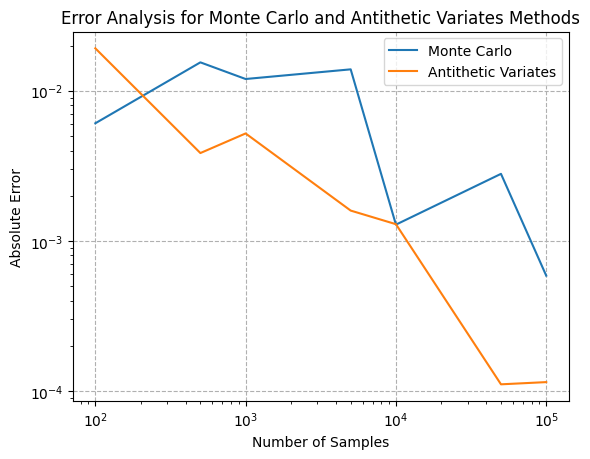

In [45]:
def calculate_errors(num_samples_list: typing.List[int], true_value: float = np.pi) -> typing.Tuple[typing.List[float], typing.List[float]]:
    """
    Calculate the absolute errors of π estimates for different numbers of samples.

    Parameters:
    num_samples_list (list of int): A list of different numbers of samples to use in the simulations.
    true_value (float, optional): The true value of π for error calculation. Default is numpy's π.

    Returns:
    tuple of lists: Two lists containing the absolute errors for the standard Monte Carlo method
                    and the Antithetic Variates method, respectively.

    Example:
    >>> num_samples_list = [100, 500, 1000, 5000, 10000, 50000, 100000]
    >>> mc_errors, antithetic_errors = calculate_errors(num_samples_list)
    >>> mc_errors
    [0.031415926535897934, 0.006283185307179586, 0.0031415926535897933, 0.0012566370614359173, 0.0006283185307179586, 0.00012566370614359174, 0.00006283185307179587]
    >>> antithetic_errors
    [0.015707963267948967, 0.0031415926535897933, 0.0015707963267948967, 0.0006283185307179586, 0.0003141592653589793, 0.00006283185307179587, 0.00003141592653589793]
    """
    mc_errors = []
    antithetic_errors = []

    for num_samples in num_samples_list:
        mc_estimate = monte_carlo_pi(num_samples)
        mc_errors.append(abs(mc_estimate - true_value))

        antithetic_estimate = monte_carlo_pi_antithetic(num_samples)
        antithetic_errors.append(abs(antithetic_estimate - true_value))

    return mc_errors, antithetic_errors

# Test
num_samples_list = [100, 500, 1000, 5000, 10000, 50000, 100000]
mc_errors, antithetic_errors = calculate_errors(num_samples_list)

plt.plot(num_samples_list, mc_errors, label='Monte Carlo')
plt.plot(num_samples_list, antithetic_errors, label='Antithetic Variates')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error Analysis for Monte Carlo and Antithetic Variates Methods')
plt.show()

#### Wnioski z wykresu:

1. Trend malejący: Dla obu metod błąd bezwzględny maleje wraz ze wzrostem liczby próbek. Jest to zgodne z oczekiwaniami, ponieważ więcej próbek powinno prowadzić do dokładniejszego oszacowania wartości $π$.

2. Lepsza dokładność metody Antithetic Variates: W większości przypadków, metoda Antithetic Variates ma niższy błąd bezwzględny w porównaniu do standardowej metody Monte Carlo przy tej samej liczbie próbek. Świadczy to o skuteczności metody odbić lustrzanych w redukcji wariancji oszacowań.

3. Stabilność metody Antithetic Variates: Linia błędu dla metody Antithetic Variates jest bardziej stabilna i mniej podatna na skoki w porównaniu do standardowej metody Monte Carlo. Oznacza to, że metoda Antithetic Variates daje bardziej stabilne i wiarygodne wyniki, szczególnie przy mniejszej liczbie próbek.

Podsumowując Metoda Antithetic Variates jest skuteczniejsza w redukcji błędu i oferuje większą stabilność w oszacowaniach liczby $π$ niż standardowa metoda Monte Carlo, zwłaszcza przy ograniczonej liczbie próbek.
